Original:
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]
 [ 67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2.    3.
    3. ]
 [ 67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2.    2.
    7. ]
 [ 37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3.    0.
    3. ]
 [ 41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1.    0.
    3. ]]

Scaled:
[[ 0.94872647  0.68620244 -2.25177456  0.75752504 -0.2649003   2.394438
   1.01668424  0.01719733 -0.69663055  1.08733806  2.27457861 -0.71113139
   0.66000414]
 [ 1.39200191  0.68620244  0.87798549  1.61121989  0.76041519 -0.41763453
   1.01668424 -1.82190531  1.43548113  0.39718162  0.64911323  2.5048807
  -0.89023814]
 [ 1.39200191  0.68620244  0.87798549 -0.6652997  -0.34228261 -0.41763453
   1.01668424 -0.90235399  1.43548113  1.34614673  0.64911323  1.43287667
   1.17675157]
 [-1.93256387  0.68620244 -0.16526786 -0.0961698   0.06397448 -0.41763453
  -0.99674

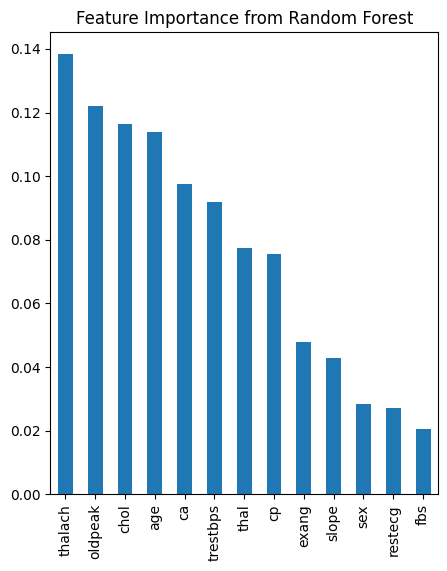

Selected Features via RFE: Index(['cp', 'restecg', 'oldpeak', 'ca', 'thal'], dtype='object')
Chi-Square p-values:
 thal        8.672776e-10
exang       2.083076e-08
ca          2.154659e-07
oldpeak     2.469786e-03
slope       7.147746e-03
cp          8.336977e-02
sex         1.117436e-01
restecg     1.343754e-01
fbs         1.550901e-01
thalach     5.356604e-01
age         8.706545e-01
trestbps    9.605862e-01
chol        9.963506e-01
dtype: float64

Selected features confirmed by at least 2 methods:
      restecg   ca  cp  oldpeak  thal
0          2  0.0   1      2.3   6.0
1          2  3.0   4      1.5   3.0
2          2  2.0   4      2.6   7.0
3          0  0.0   3      3.5   3.0
4          2  0.0   2      1.4   3.0
..       ...  ...  ..      ...   ...
298        0  0.0   1      1.2   7.0
299        0  2.0   4      3.4   7.0
300        0  1.0   4      1.2   7.0
301        2  1.0   2      0.0   3.0
302        0  0.0   3      0.0   3.0

[303 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from feature_selection import X_selected
from preprocessing import y
import os


Logistic Regression:
Accuracy: 0.5738
Precision: 0.5342
Recall: 0.5738
F1-score: 0.5531


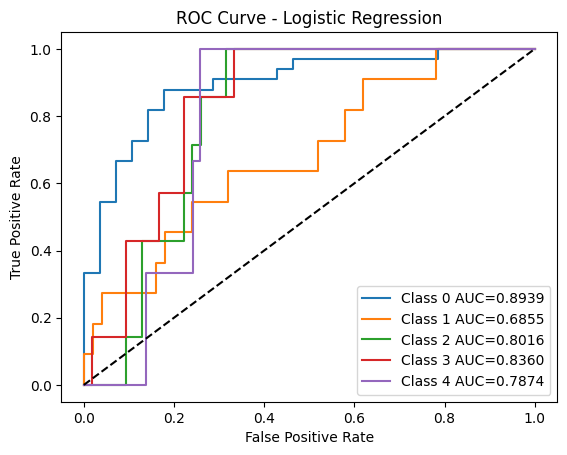


Decision Tree:
Accuracy: 0.3770
Precision: 0.4217
Recall: 0.3770
F1-score: 0.3973


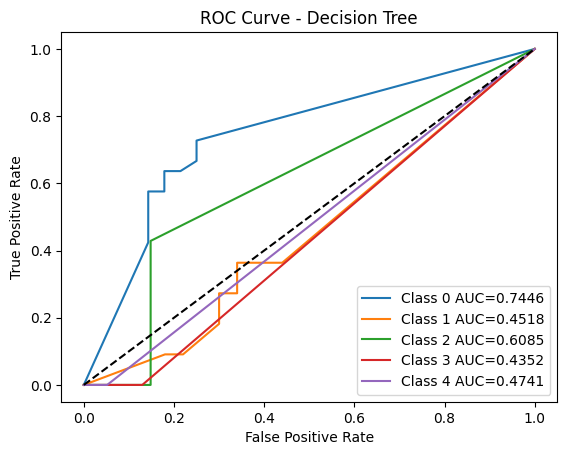


Random Forest:
Accuracy: 0.4918
Precision: 0.5034
Recall: 0.4918
F1-score: 0.4964


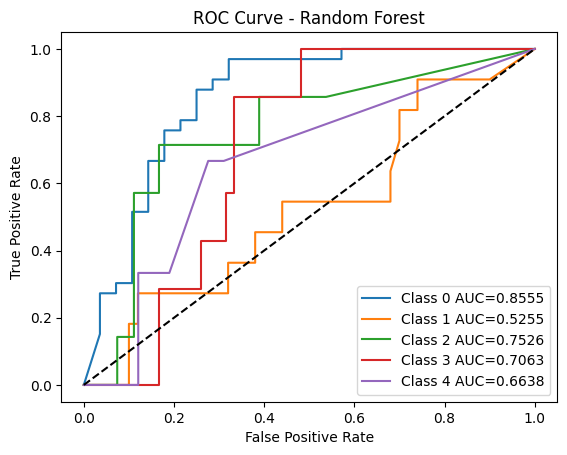


Support Vector Machine:
Accuracy: 0.5738
Precision: 0.5208
Recall: 0.5738
F1-score: 0.5424


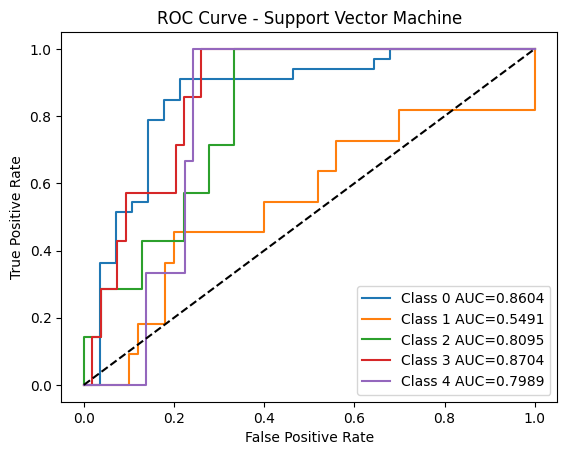

In [ ]:
###Supervised Learning - Classification Models###

# Use the selected features
X_final = X_selected.values # convert to numpy array for sklearn
y_final = y

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

# Initialize models
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
model_rf = RandomForestClassifier(random_state=42)
model_svm = SVC(random_state=42, probability=True)

models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Support Vector Machine": model_svm
}

# Make y_test binary (one-vs-rest) for ROC/AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    
    # ROC curve for each class
    plt.figure()
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        auc_score = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} AUC={auc_score:.4f}')
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()
